# Digit Recognizer
Learn Computer Fundamentals with MNIST Data

Modules to be used
1. Numpy
2. Matplotlib
1. Tensorflow 
2. Keras
3. Scitlearn

In [2]:
#Fetch Libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#Keras module that contains the mnist dataset
from keras.datasets import mnist

#Modules to build the model 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


2022-05-02 22:03:00.290420: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-02 22:03:00.290451: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Using Kaggle's Api to Load Data

In [3]:
#Fetch the mnist data 
#mnist.load_data?

#Download the data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnisst.npz
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#Fetch the dimensions of the data
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
#Function to plot images from the dataset
def plot_input_img(i):
    plt.imshow(X_train[i], cmap = 'binary') #Get binary images
    plt.title(y_train[i])
    plt.show

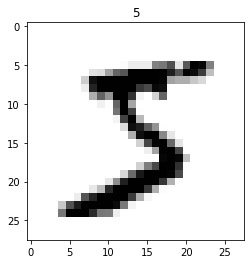

In [6]:
#Plot the first image to chec if dataset loaded
plot_input_img(0)

In [7]:
#Preprocess the images for visualization

#Normalize the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Increase the dimension of the images to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

#Convert y_train and y_test to one hot (Matrix values)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Building The Machine Learning Model

In [8]:
#Building the model
#Initialize the model
model = Sequential()

model.add(Conv2D(32, (3,3),input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

#Prevent overfitting by dropping it out by 25%
model.add(Dropout(0.25))

#Classification layer
model.add(Dense(10, activation = 'softmax'))

2022-05-02 22:03:07.111471: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-02 22:03:07.111535: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-02 22:03:07.111566: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wambugu-g55505): /proc/driver/nvidia/version does not exist
2022-05-02 22:03:07.111887: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [10]:
#Compiling the model
model.compile(optimizer='adam',loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [18]:
#Callback functions

from keras.callbacks import EarlyStopping, ModelCheckpoint

#Earlystopping to prevent overfitting
#Giving it a variable to monitor
es = EarlyStopping(monitor = 'val_acc',min_delta = 0.01, patience = 4, verbose =1)

#Model Checkpoint
mc = ModelCheckpoint("./bestmodel.h5", monitor =  "val_acc", verbose = 1, save_best_only = True)
model.save('/home/wambugumm/Development/DataAnalysis/DigitRecognizer/bestmodel.h5')
#Building the callback
cb = [es,mc]

## Training The Model

In [12]:
#50 iterations of training the model
his = model.fit(X_train, y_train, epochs = 50, validation_split = 0.3, callbacks = cb)

Epoch 1/50


2022-05-02 22:03:12.535630: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 131712000 exceeds 10% of free system memory.


1313/1313 [==============================] - 14s 11ms/step - loss: 0.2178 - accuracy: 0.9342 - val_loss: 0.0847 - val_accuracy: 0.9742
Epoch 2/50
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0741 - accuracy: 0.9775 - val_loss: 0.0644 - val_accuracy: 0.9797
Epoch 3/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0557 - accuracy: 0.9826 - val_loss: 0.0507 - val_accuracy: 0.9843
Epoch 4/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0533 - val_accuracy: 0.9837
Epoch 5/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.0409 - val_accuracy: 0.9872
Epoch 6/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0421 - val_accuracy: 0.9871
Epoch 7/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0391 - val_accura

In [19]:
model_S = keras.models.load_model("/home/wambugumm/Development/DataAnalysis/DigitRecognizer/bestmodel.h5")

In [20]:
#Compare the accuracy of the training model to the test model
score = model_S.evaluate(X_test,y_test)
print(f"The model accuracy is {score[1]} ")


313/313 [==============================] - 1s 4ms/step - loss: 0.0441 - accuracy: 0.9924
The model accuracy is 0.9923999905586243 
